In [27]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.io.wavfile import write


## Basic Sequences

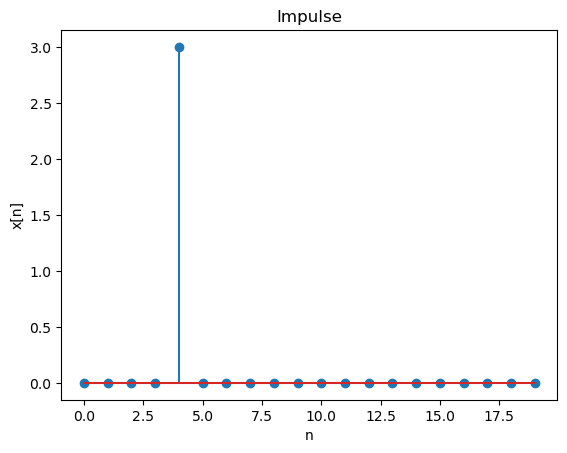

In [5]:
# Impulse

impulse = np.zeros(20)
impulse[4] = 3

plt.stem(impulse)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Impulse")
plt.show()

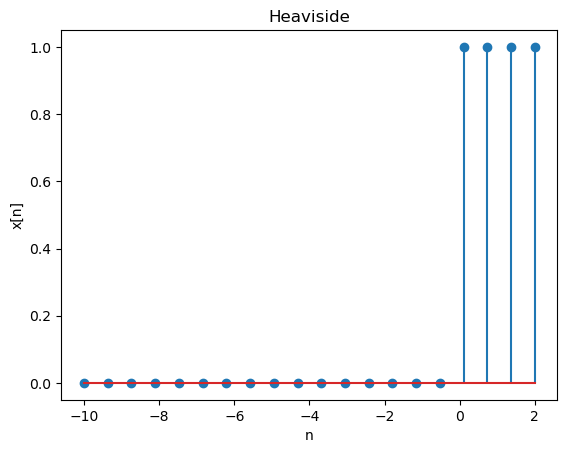

In [29]:
#Heaviside Step Function
# Generate the step values
step_axis = np.linspace(-10, 2, 20)
step = np.where(step_axis >= 0, 1, 0)
plt.stem(step_axis,step)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Heaviside")
plt.show()

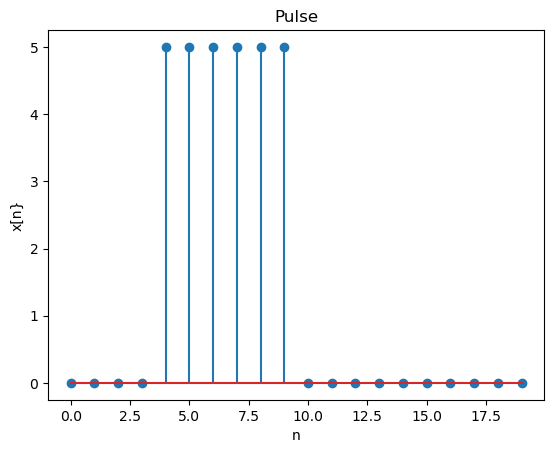

In [15]:
# Pulse

step = np.zeros(20)
step[4:10] = 5

plt.stem(step)
plt.xlabel("n")
plt.ylabel("x[n}")
plt.title("Pulse")
plt.show()

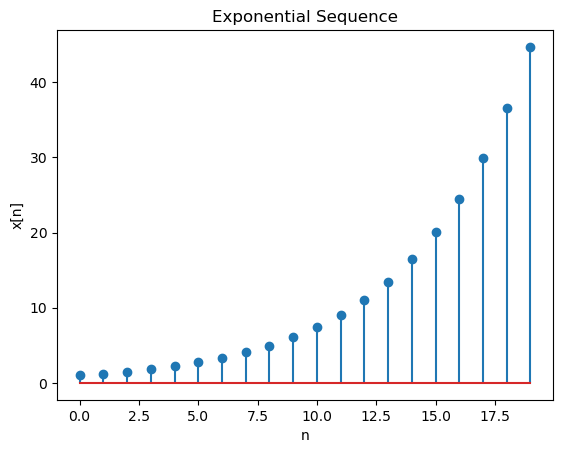

In [17]:
#Exponential Growth
n = np.arange(0, 20)  # Time index from 0 to 19
expSeq = np.exp(0.2 * n)  # Exponential function

plt.stem(n, expSeq)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Exponential Sequence")
plt.show()

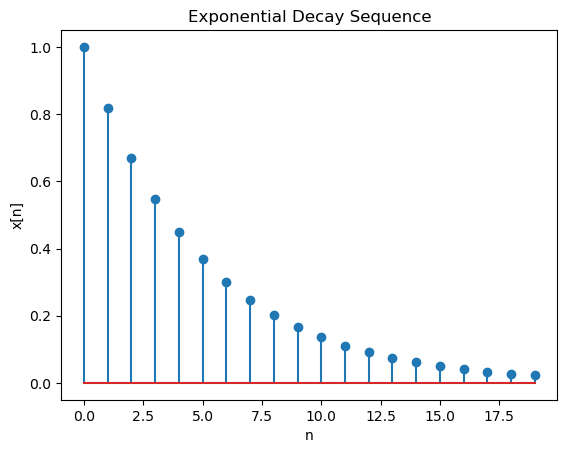

In [19]:
expDecaySeq = np.exp(-0.2 * n)  # Exponential decay

plt.stem(n, expDecaySeq)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Exponential Decay Sequence")
plt.show()

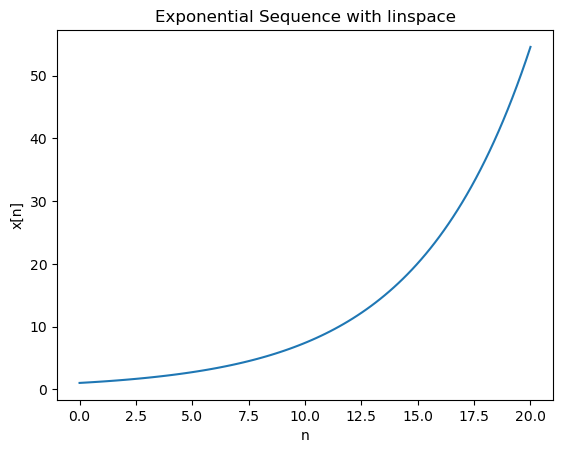

In [21]:
n = np.linspace(0, 20, 100)  # Generates 100 points between 0 and 20
expSeq = np.exp(0.2 * n)

plt.plot(n, expSeq)  # Use plot instead of stem for smooth visualization
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Exponential Sequence with linspace")
plt.show()

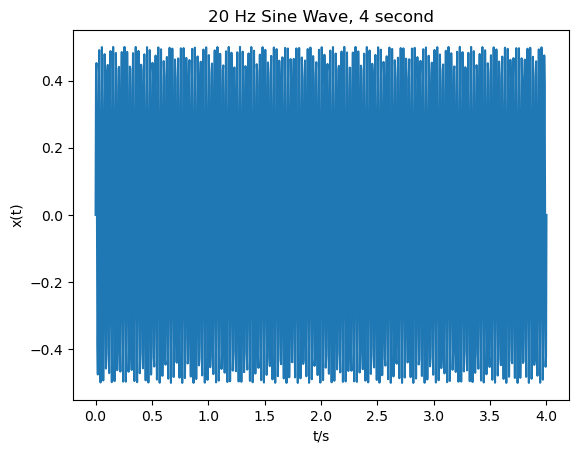

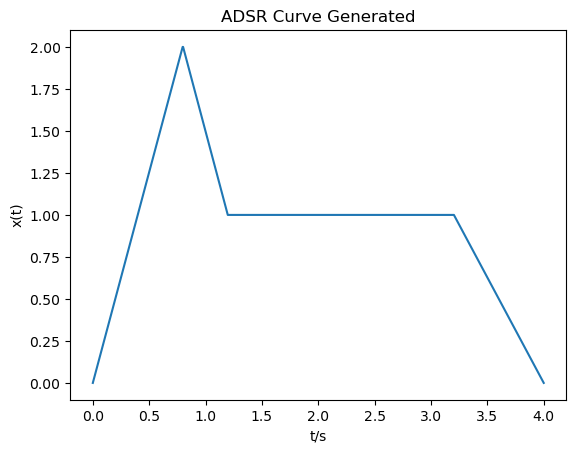

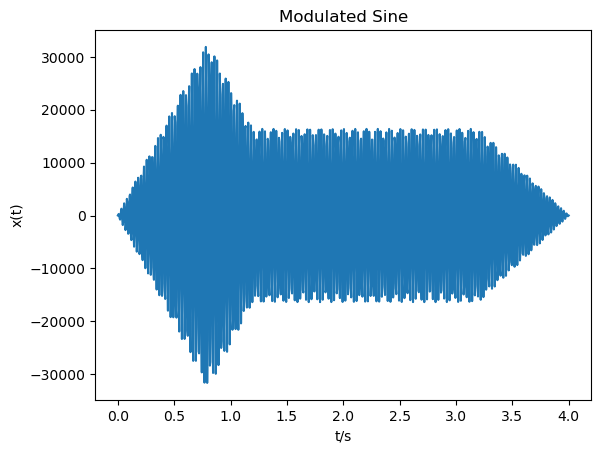

In [71]:
# Implement ADSR On The Previously Generated Sine


samplerate = 1000 # 1000 points every second
# 4 second of audio
timeAxis  = np.linspace(0, 4, samplerate)
freq = 40

sineWave = 0.5*np.sin(2*np.pi*freq*timeAxis)

plt.plot(timeAxis, sineWave)
plt.xlabel("t/s")
plt.ylabel("x(t)")
plt.title("20 Hz Sine Wave, 4 second")
plt.show()

#Assume sustain level is 50%

def ADSR(attackTime, decayTime, sustainTime, releaseTime, samplerate):
    
    # An attack is a linear ramp up
    attack = np.linspace(0,2,int(samplerate*attackTime))
    # An Decay is a linear ramp down
    decay = np.linspace(2,1,int(samplerate*decayTime))
    #Sustain is a unit-step function
    sustain = np.linspace(1,1,int(samplerate*sustainTime))
    # Release is another linear ramp down
    release = np.linspace(1,0,int(samplerate*releaseTime))
    
    adsr = np.concatenate((attack,decay, sustain, release), axis=None)
    return adsr

# Parameters in seconds
attackTime = 0.2
decayTime = 0.1
sustainTime = 0.5
releaseTime = 0.2

#Calling the function
adsr = ADSR(attackTime, decayTime, sustainTime, releaseTime, samplerate)

plt.figure()
plt.plot(timeAxis,adsr)
plt.xlabel("t/s")
plt.ylabel("x(t)")
plt.title("ADSR Curve Generated")
plt.show()


w = sineWave*adsr
w =(w * 32767).astype(np.int16)
write("modulated_sine.wav", samplerate, w)


plt.figure()
plt.plot(timeAxis,w)
plt.xlabel("t/s")
plt.ylabel("x(t)")
plt.title("Modulated Sine")
plt.show()